In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

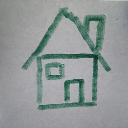

In [3]:
im = Image.open('../datasets/train/house/im_000006.png')
im

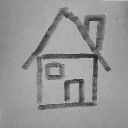

In [4]:
bw = im.convert('L')
bw

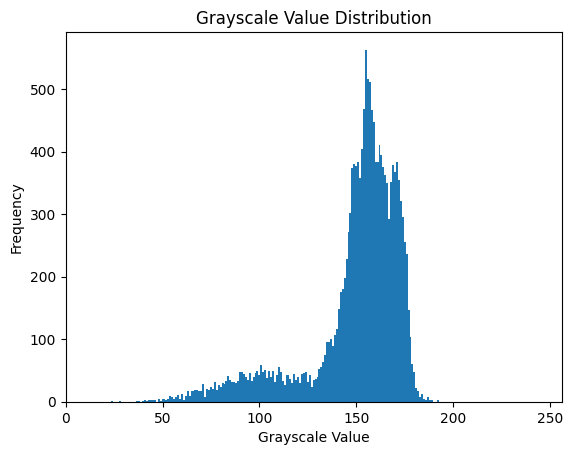

In [24]:
hist, bins = np.histogram(np.array(bw), bins=256, range=(0, 256))

# Plot the histogram
plt.bar(bins[:-1], hist, width=1)
plt.xlim(min(bins), max(bins))
plt.title('Grayscale Value Distribution')
plt.xlabel('Grayscale Value')
plt.ylabel('Frequency')
plt.show()

In [22]:
print(len(bins))
print(bins)
print(len(hist))
print(hist)

257
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 1

[0.25102004 0.27361138 0.29620273 0.31879408 0.34138543 0.36397678
 0.38656813 0.40915948 0.43175083 0.45434218 0.47693353 0.49952488
 0.52211623 0.54470758 0.56729893 0.58989028 0.61248163 0.63507298
 0.65766433 0.68025568 0.70284702 0.72543837 0.74802972 0.77062107
 0.79321242 0.81580377 0.83839512 0.86098647 0.88357782 0.90616917
 0.92876052 0.95135187 0.97394322 0.99653457 1.01912592 1.04171727
 1.06430862 1.08689997 1.10949132 1.13208267 1.15467401 1.17726536
 1.19985671 1.22244806 1.24503941 1.26763076 1.29022211 1.31281346
 1.33540481 1.35799616 1.38058751 1.40317886 1.42577021 1.44836156
 1.47095291 1.49354426 1.51613561 1.53872696 1.56131831 1.58390965
 1.606501   1.62909235 1.6516837  1.67427505 1.6968664  1.71945775
 1.7420491  1.76464045 1.7872318  1.80982315 1.8324145  1.85500585
 1.8775972  1.90018855 1.9227799  1.94537125 1.9679626  1.99055395
 2.01314529 2.03573664 2.05832799 2.08091934 2.10351069 2.12610204
 2.14869339 2.17128474 2.19387609 2.21646744 2.23905879 2.2616

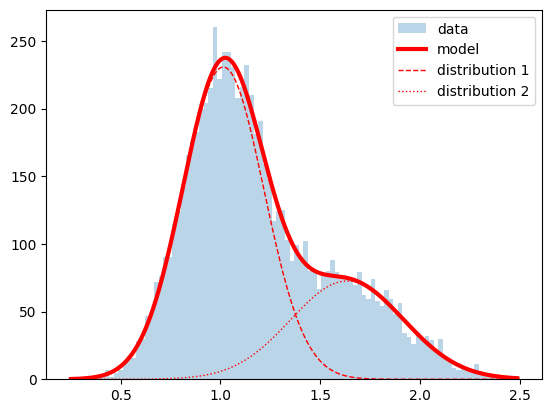

In [9]:
#data generation
np.random.seed(123)
data=np.concatenate((np.random.normal(1, .2, 5000), np.random.normal(1.6, .3, 2500)))
y,x,_=plt.hist(data, 100, alpha=.3, label='data')
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

print(x)
print(y)

#x, y inputs can be lists or 1D numpy arrays

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected = (1, .2, 250, 2, .2, 125)
params, cov = curve_fit(bimodal, x, y, expected)
sigma=np.sqrt(np.diag(cov))
x_fit = np.linspace(x.min(), x.max(), 500)
#plot combined...
plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=3, label='model')
#...and individual Gauss curves
plt.plot(x_fit, gauss(x_fit, *params[:3]), color='red', lw=1, ls="--", label='distribution 1')
plt.plot(x_fit, gauss(x_fit, *params[3:]), color='red', lw=1, ls=":", label='distribution 2')
#and the original data points if no histogram has been created before
#plt.scatter(x, y, marker="X", color="black", label="original data")
plt.legend()
plt.show() 

[158.65113205  12.34040765 466.87856096]


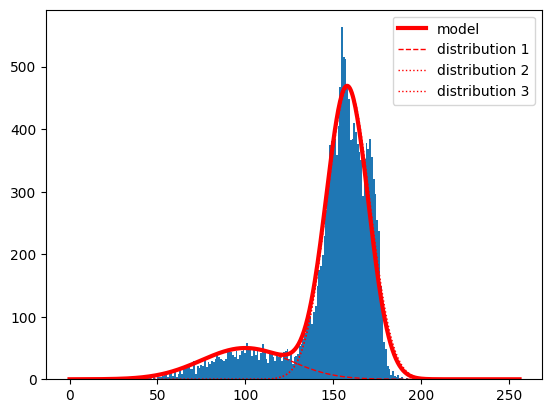

In [38]:
expected = (100, 25, 50, 158, 12, 466)
params, cov = curve_fit(gauss, bins[:-1], hist, expected[3:])
print(params)
sigma=np.sqrt(np.diag(cov))
x_fit = np.linspace(bins.min(), bins.max(), 500)
#plot combined...
plt.bar(bins[:-1], hist, width=1)
plt.plot(x_fit, bimodal(x_fit, *expected), color='red', lw=3, label='model')
#...and individual Gauss curves
plt.plot(x_fit, gauss(x_fit, *expected[:3]), color='red', lw=1, ls="--", label='distribution 1')
plt.plot(x_fit, gauss(x_fit, *expected[3:]), color='red', lw=1, ls=":", label='distribution 2')
plt.plot(x_fit, gauss(x_fit, *params), color='red', lw=1, ls=":", label='distribution 3')
#and the original data points if no histogram has been created before
#plt.scatter(x, y, marker="X", color="black", label="original data")
plt.legend()
plt.show() 

[158.65112276  12.34039078 466.87888009]


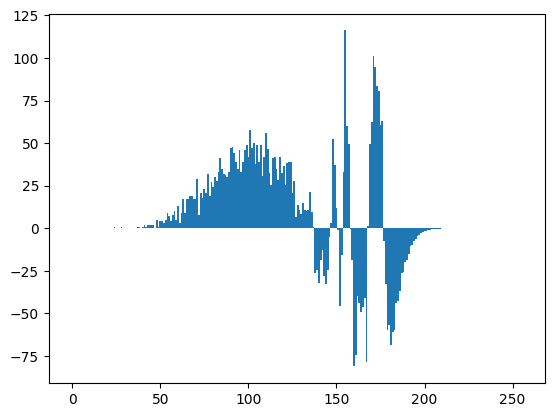

[99.46228478 19.5914674  46.63088991]


In [46]:
params1, _ = curve_fit(gauss, range(256), hist, (150, 10, 200))
print(params1)
hist2 = np.array([hist[i] - gauss(i, *params1) for i in range(256)])
plt.bar(bins[:-1], hist2, width=1)
plt.show()
params2, _ = curve_fit(gauss, range(256), hist2, (100, 25, 50))
print(params2)

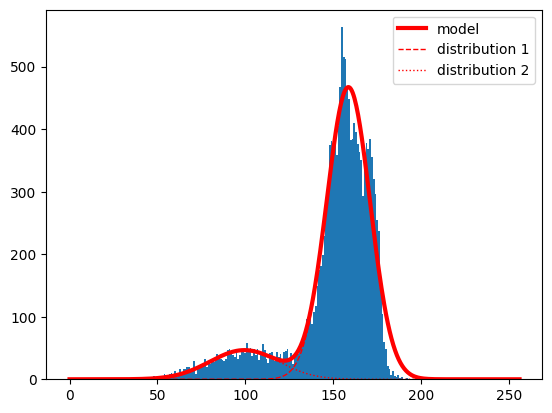

In [47]:
#plot combined...
plt.bar(bins[:-1], hist, width=1)
plt.plot(x_fit, bimodal(x_fit, *params1, *params2), color='red', lw=3, label='model')
#...and individual Gauss curves
plt.plot(x_fit, gauss(x_fit, *params1), color='red', lw=1, ls="--", label='distribution 1')
plt.plot(x_fit, gauss(x_fit, *params2), color='red', lw=1, ls=":", label='distribution 2')
# plt.plot(x_fit, gauss(x_fit, *), color='red', lw=1, ls=":", label='distribution 3')
#and the original data points if no histogram has been created before
#plt.scatter(x, y, marker="X", color="black", label="original data")
plt.legend()
plt.show() 

In [126]:
def final_test(img_name):
    im = Image.open(img_name)
    bw = im.convert('L')
    
    hist, _ = np.histogram(np.array(bw), bins=256, range=(0, 256))
    
    params1, _ = curve_fit(gauss, range(256), hist, (150, 10, 200))
    print(params1)
    hist2 = np.array([hist[i] - gauss(i, *params1) for i in range(256)])
    cutoff = min(params1[0] - 3 * params1[1], 150)

    params2, _ = curve_fit(gauss, range(256), hist2, (100, 25, 50))
    print(params2)

    # plot combined...
    plt.bar(range(256), hist, width=1)
    plt.plot(range(256), bimodal(range(256), *params1, *params2), color='red', lw=3, label='model')
    plt.plot(cutoff, bimodal(cutoff, *params1, *params2), 'ro')
    # ...and individual Gauss curves
    plt.plot(range(256), gauss(range(256), *params1), color='red', lw=1, ls="--", label='distribution 1')
    plt.plot(range(256), gauss(range(256), *params2), color='red', lw=1, ls=":", label='distribution 2')

    plt.legend()
    plt.show() 

    return bw.point(lambda x: 255 if x > 125 else 0)

[168.75959511  29.5290636  196.04681819]
[ 80.26305138   9.83948889 120.49928494]


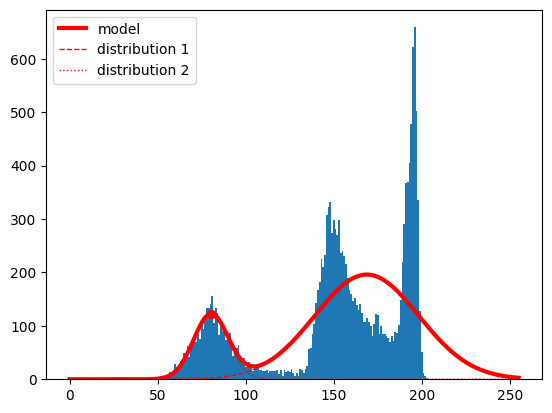

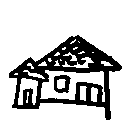

In [128]:
final_test('../datasets/train/house/im_000032.png')

In [105]:
houses = [75, 95, 80, 100, 115, 60, 120, 125, 110, 80, 90, 80, 40, 70]

In [182]:
def test_from_bottom(image_name):
    im = Image.open(image_name)
    bw = im.convert('L')
    
    hist, _ = np.histogram(np.array(bw), bins=256, range=(0, 256))
    
    base_params = np.array([50, 10, 100])
    params1, _ = curve_fit(gauss, range(120), hist[:120], (90, 10, 100))
    print(params1)
    hist2 = np.array([hist[i] - gauss(i, *params1) for i in range(256)])
    min_cutoff = max(params1[0] - 3 * abs(params1[1]), 20)
    max_cutoff = min(params1[0] + 3 * abs(params1[1]), 125)

    # plot combined...
    plt.bar(range(256), hist, width=1)
    # plt.plot(range(256), bimodal(range(256), *params1, *params2), color='red', lw=3, label='model')
    plt.plot(min_cutoff, gauss(min_cutoff, *params1), 'ro')
    plt.plot(max_cutoff, gauss(max_cutoff, *params1), 'ro')
    # ...and individual Gauss curves
    plt.plot(range(256), gauss(range(256), *params1), color='red', lw=1, ls="--", label='distribution 1')
    plt.plot(range(256), gauss(list(range(256)), *base_params), color='red', lw=1, ls=":", label='distribution 2')

    plt.legend()
    plt.show() 

    return bw.point(lambda x: 0 if min_cutoff < x and x < max_cutoff else 255)


[ 62.283781     5.82077014 178.23260589]


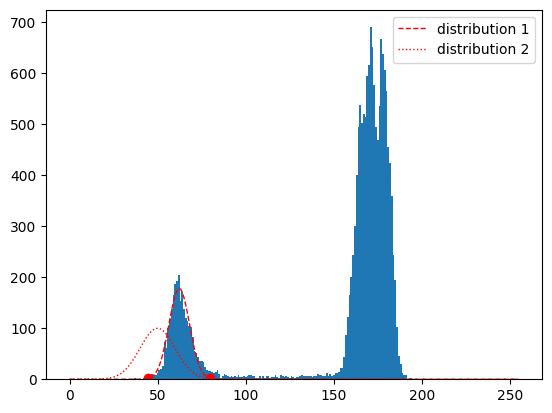

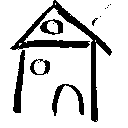

In [186]:
test_from_bottom('../datasets/train/house/im_000009.png')